In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [3]:
df = pd.read_csv('final_dataset_ridotto.csv')  # colonne: 'gene', 'disease'
df.describe()

,gene,disease
count,52769,52769
unique,9334,250
top,HLA-DQA1,cancer
freq,81,3168


In [4]:
B = nx.Graph()
genes = df['gene'].unique()
diseases = df['disease'].unique()

B.add_nodes_from(genes, bipartite='gene')
B.add_nodes_from(diseases, bipartite='disease')

edges = list(df.itertuples(index=False, name=None))
B.add_edges_from(edges)

In [5]:
gene_graph = nx.bipartite.projected_graph(B, genes)

print(f"Numero di nodi (geni): {gene_graph.number_of_nodes()}")
print(f"Numero di archi (connessioni tra geni): {gene_graph.number_of_edges()}")

Numero di nodi (geni): 9334
Numero di archi (connessioni tra geni): 10146630


In [ ]:
G_real = gene_graph  
n = G_real.number_of_nodes()
m = G_real.number_of_edges()

p = 2 * m / (n * (n - 1))
G_er = nx.erdos_renyi_graph(n, p) #ER graph

m_ba = max(1, int(m / n))
G_ba = nx.barabasi_albert_graph(n, m_ba) #BA graph


In [24]:
g=G_real
#g=G_er
#g=G_ba

In [30]:
nx.density(g)


0.232950022787324

In [25]:
sum(dict(g.degree()).values())/float(len(g))


2174.1225626740948

In [32]:
degree_sequence = [d for n, d in g.degree()]
degree_max = np.max(degree_sequence)
degree_min = np.min(degree_sequence)
degree_mean = np.mean(degree_sequence)

print(f"Max degree: {degree_max}")
print(f"Min degree: {degree_min}")
print(f"Avg degree: {degree_mean:.2f}")

Max degree: 7452
Min degree: 1
Avg degree: 2174.12


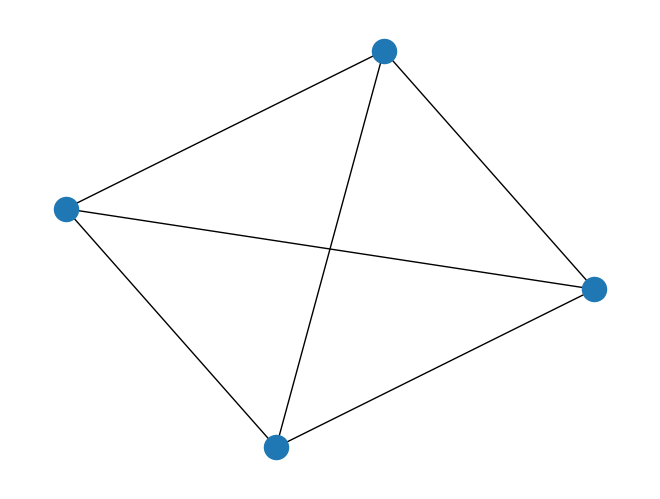

In [29]:
comps = list(nx.connected_components(g)) 
comp_1 = nx.subgraph(g, comps[1])
nx.draw(comp_1)

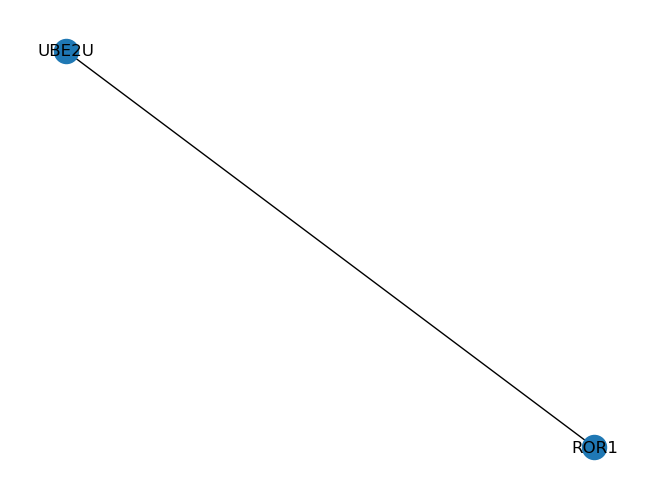

In [ ]:
ego = nx.ego_graph(g, 'ROR1') 
nx.draw(ego, with_labels=True)

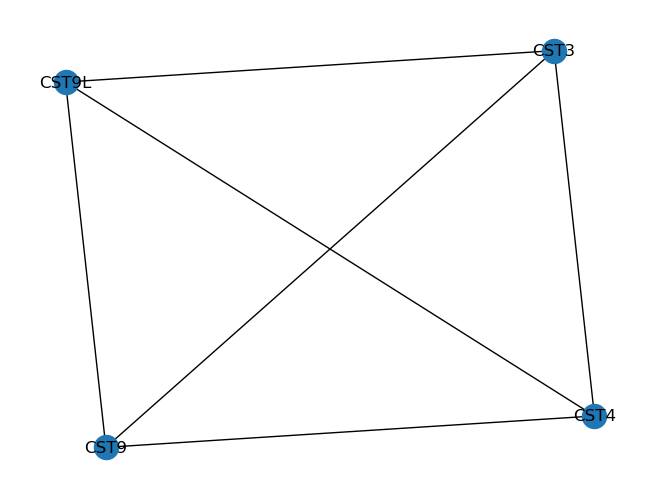

In [27]:
ego = nx.ego_graph(g, 'CST3') 
nx.draw(ego, with_labels=True)

In [ ]:
nx.diameter(g.subgraph(comps[0])) # we compute the diameter on the giant component


In [ ]:
components = nx.connected_components(g)
for i, comp in enumerate(components, start=1):
        subG = g.subgraph(comp)
        avg = nx.average_shortest_path_length(subG)
        print(f"Component {i}: average shortest path = {avg:.3f}")


In [ ]:
nx.average_clustering(g) 
